<a href="https://colab.research.google.com/github/33577/suicideRatePrediction/blob/master/Suicide_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

In [1]:
ls

countries_of_the_world.csv  sample_data/  suicide_rates.csv


In [0]:
import pandas as pd
df1 = pd.read_csv('suicide_rates.csv')
df2 = pd.read_csv('countries_of_the_world.csv')


In [199]:
df1_2010 = df1[df1.year == 2010]
df1_2010.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
252,Albania,2010,male,55-74 years,20,241852,8.27,Albania2010,0.722,"11,926,953,259",4359,Silent
253,Albania,2010,male,35-54 years,20,371611,5.38,Albania2010,0.722,"11,926,953,259",4359,Generation X
254,Albania,2010,male,25-34 years,9,179720,5.01,Albania2010,0.722,"11,926,953,259",4359,Generation X
255,Albania,2010,male,75+ years,2,50767,3.94,Albania2010,0.722,"11,926,953,259",4359,Silent
256,Albania,2010,male,15-24 years,10,279508,3.58,Albania2010,0.722,"11,926,953,259",4359,Millenials


In [200]:
df1_2010.drop('suicides_no', axis=1, inplace=True)
df1_2010.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,country,year,sex,age,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
252,Albania,2010,male,55-74 years,241852,8.27,Albania2010,0.722,"11,926,953,259",4359,Silent
253,Albania,2010,male,35-54 years,371611,5.38,Albania2010,0.722,"11,926,953,259",4359,Generation X
254,Albania,2010,male,25-34 years,179720,5.01,Albania2010,0.722,"11,926,953,259",4359,Generation X
255,Albania,2010,male,75+ years,50767,3.94,Albania2010,0.722,"11,926,953,259",4359,Silent
256,Albania,2010,male,15-24 years,279508,3.58,Albania2010,0.722,"11,926,953,259",4359,Millenials


In [201]:
df1_2010.drop('population', axis=1, inplace=True)
df1_2010.drop('country-year', axis=1, inplace=True)
df1_2010.drop('HDI for year', axis=1, inplace=True)
df1_2010.drop('year', axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [202]:
df1_2010.head()

,country,sex,age,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
252,Albania,male,55-74 years,8.27,"11,926,953,259",4359,Silent
253,Albania,male,35-54 years,5.38,"11,926,953,259",4359,Generation X
254,Albania,male,25-34 years,5.01,"11,926,953,259",4359,Generation X
255,Albania,male,75+ years,3.94,"11,926,953,259",4359,Silent
256,Albania,male,15-24 years,3.58,"11,926,953,259",4359,Millenials


In [203]:
# 나중에 앞으로 빼자 
# column 이름에 스페이스바 지우기 
df1_2010.columns = df1_2010.columns.str.replace(' ', '')
df1_2010.head()

,country,sex,age,suicides/100kpop,gdp_for_year($),gdp_per_capita($),generation
252,Albania,male,55-74 years,8.27,"11,926,953,259",4359,Silent
253,Albania,male,35-54 years,5.38,"11,926,953,259",4359,Generation X
254,Albania,male,25-34 years,5.01,"11,926,953,259",4359,Generation X
255,Albania,male,75+ years,3.94,"11,926,953,259",4359,Silent
256,Albania,male,15-24 years,3.58,"11,926,953,259",4359,Millenials


In [204]:
df1_2010.drop('gdp_for_year($)', axis=1, inplace=True)
df1_2010.drop('gdp_per_capita($)', axis=1, inplace=True)
df1_2010.drop('generation', axis=1, inplace=True)
df1_2010.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,country,sex,age,suicides/100kpop
252,Albania,male,55-74 years,8.27
253,Albania,male,35-54 years,5.38
254,Albania,male,25-34 years,5.01
255,Albania,male,75+ years,3.94
256,Albania,male,15-24 years,3.58


In [205]:
df2.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.00,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [206]:
df1_2010.head()

,country,sex,age,suicides/100kpop
252,Albania,male,55-74 years,8.27
253,Albania,male,35-54 years,5.38
254,Albania,male,25-34 years,5.01
255,Albania,male,75+ years,3.94
256,Albania,male,15-24 years,3.58


In [207]:
df2['Climate'].value_counts()


2.0    111
3.0     48
1.0     29
5.0      8
4.0      6
6.0      3
Name: Climate, dtype: int64

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

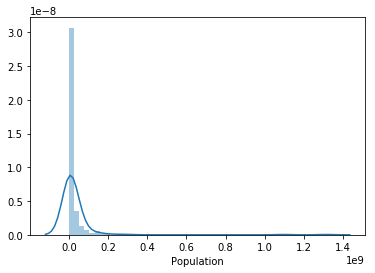

In [209]:
sns.distplot(df2['Population'])

## check null value 


In [210]:
df2_na = (df2.isnull().sum() / len(df2)) * 100
df2_na = df2_na.drop(df2_na[df2_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'missing ratio': df2_na})
missing_data.head(20)

,missing ratio
Climate,9.691630
Literacy (%),7.929515
Industry,7.048458
Service,6.607930
Agriculture,6.607930
Deathrate,1.762115
Phones (per 1000),1.762115
Net migration,1.762115
Birthrate,1.321586
Infant mortality (per 1000 births),1.321586


### fill Something to missing values

In [0]:
## TODO 0 이 아니라 업계 평균으로 바꾸기 

df2['Climate'] = df2['Climate'].fillna(0)
df2_column_headers = list(df2.columns.values)
for c in df2_column_headers:
  df2[c] = df2[c].fillna(0)


In [212]:
df2['Climate'].value_counts()

2.0    111
3.0     48
1.0     29
0.0     22
5.0      8
4.0      6
6.0      3
Name: Climate, dtype: int64

In [213]:
# df1_2010은 missing value가 없다.
df1_2010_na = (df1_2010.isnull().sum() / len(df1_2010)) * 100
df1_2010_na = df1_2010_na.drop(df1_2010_na[df1_2010_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'missing ratio': df1_2010_na})
missing_data.head(20)

,missing ratio


## df1_2010 df2 합치기

In [214]:
df1_2010.head()

,country,sex,age,suicides/100kpop
252,Albania,male,55-74 years,8.27
253,Albania,male,35-54 years,5.38
254,Albania,male,25-34 years,5.01
255,Albania,male,75+ years,3.94
256,Albania,male,15-24 years,3.58


In [215]:
df2.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.00,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000


In [0]:
df1_2010.columns = df1_2010.columns.str.replace('country', 'Country')



In [217]:
df1_2010[df1_2010.Country=='Albania']

,Country,sex,age,suicides/100kpop
252,Albania,male,55-74 years,8.27
253,Albania,male,35-54 years,5.38
254,Albania,male,25-34 years,5.01
255,Albania,male,75+ years,3.94
256,Albania,male,15-24 years,3.58
257,Albania,female,25-34 years,3.27
258,Albania,female,75+ years,3.10
259,Albania,female,35-54 years,3.04
260,Albania,female,55-74 years,2.90
261,Albania,female,15-24 years,2.28


In [218]:
df2[df2.Country=='Andorra ']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.0,6.6,4.05,19000.0,100.0,497.2,2.22,0.0,97.78,3.0,8.71,6.25,0.0,0.0,0.0


In [219]:
df2['Country'] = df2['Country'].str.strip()
df2[df2.Country=='Andorra']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.0,6.6,4.05,19000.0,100.0,497.2,2.22,0.0,97.78,3.0,8.71,6.25,0.0,0.0,0.0


In [220]:
all_data = pd.merge(df2, df1_2010, on='Country')
all_data.head()
#pd.merge(df1_2010, df2, left_on = 'country', right_on = 'Country', how = 'inner', indicator = True)

#pd.concat([df1_2010, df2], join = 'inner', axis = 1)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,sex,age,suicides/100kpop
0,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,male,55-74 years,8.27
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,male,35-54 years,5.38
2,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,male,25-34 years,5.01
3,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,male,75+ years,3.94
4,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,male,15-24 years,3.58


In [221]:
all_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,sex,age,suicides/100kpop
0,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,male,55-74 years,8.27
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,male,35-54 years,5.38
2,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,male,25-34 years,5.01
3,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,male,75+ years,3.94
4,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,male,15-24 years,3.58


In [222]:
all_data  = all_data.replace(to_replace = r'female', value = 2, regex=True)
all_data  = all_data.replace(to_replace = r'male', value = 1, regex=True)


all_data  = all_data.replace(to_replace = r'5-14 years', value = 10, regex=True)
all_data  = all_data.replace(to_replace = r'15-24 years', value = 20, regex=True)
all_data  = all_data.replace(to_replace = r'25-34 years', value = 30, regex=True)
all_data  = all_data.replace(to_replace = r'35-54 years', value = 45, regex=True)
all_data  = all_data.replace(to_replace = r'55-74 years', value = 65, regex=True)
all_data  = all_data.replace(to_replace = r'75\+ years', value = 80, regex=True)

all_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,sex,age,suicides/100kpop
0,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,1,65,8.27
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,1,45,5.38
2,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,1,30,5.01
3,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,1,80,3.94
4,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,1,20,3.58


In [223]:
#TODO
corr = all_data.corr(method='pearson').drop(['suicides/100kpop']).sort_values('suicides/100kpop', ascending=False)['suicides/100kpop']
#corr = all_data.corr(method = 'pearson')
corr

age                                   0.338213
Deathrate                             0.205279
Arable (%)                            0.141184
Literacy (%)                          0.136741
Phones (per 1000)                     0.091964
Climate                               0.069800
GDP ($ per capita)                    0.037390
Service                               0.030897
Agriculture                           0.007644
Area (sq. mi.)                        0.004798
Population                           -0.008056
Net migration                        -0.017786
Industry                             -0.036477
Pop. Density (per sq. mi.)           -0.046840
Other (%)                            -0.068778
Coastline (coast/area ratio)         -0.133391
Infant mortality (per 1000 births)   -0.139736
Crops (%)                            -0.195735
Birthrate                            -0.248274
sex                                  -0.419890
Name: suicides/100kpop, dtype: float64

In [224]:
#승준
#corr = all_data.corr(method = 'pearson')
#corr
#df2['Net migration'] = df2['Net migration'].astype(float)
#all_data = pd.to_numeric(all_data)
all_data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
sex                                     int64
age                               

In [225]:
all_data.shape

(996, 23)

# Modeling

In [0]:
ntrain = 800
y_train = all_data['suicides/100kpop'].values[:ntrain]
all_data.drop('suicides/100kpop', axis=1, inplace=True)
all_data.drop('Country', axis=1, inplace=True)
all_data.drop('Region', axis=1, inplace=True)

train = all_data[:ntrain]
test = all_data[ntrain:]


In [227]:
all_data.dtypes

Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
sex                                     int64
age                                     int64
dtype: object

In [228]:
all_data['Net migration'].value_counts()


 0.00     96
 4.05     24
 2.07     24
-0.31     24
 14.18    12
 0.61     12
-4.87     12
 2.18     12
-2.07     12
-0.29     12
 0.95     12
-0.13     12
-2.45     12
 0.43     12
 5.96     12
 0.30     12
 8.97     12
-3.35     12
-0.71     12
 2.35     12
-4.92     12
-1.67     12
 2.00     12
 8.00     12
-8.00     12
 13.00    12
 0.28     12
-3.74     12
 3.98     12
 2.54     12
          ..
 0.99     12
-0.39     12
 2.19     12
-2.23     12
-0.86     12
-0.03     12
-0.08     12
-1.72     12
-0.49     12
-4.70     12
 16.29    12
-0.90     12
-13.92    12
 1.74     12
-5.69     12
 1.03     12
 1.12     12
 0.97     12
 4.99     12
-1.46     12
 2.48     12
-6.47     12
 1.05     12
 0.66     12
-1.22     12
 3.57     12
-4.93     12
-0.91     12
-3.16     12
 0.86     12
Name: Net migration, Length: 73, dtype: int64

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

In [0]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=3))


In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


In [0]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) #kernel = 'rbf' , 'sigmoid' 


In [0]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [0]:
# A parameter grid for XGBoost
#params = {'min_child_weight':[i/10.0 for i in range(5,18)], 'gamma':[i/100.0 for i in range(3,6)],  
#'subsample':[i/10.0 for i in range(4,9)], 'colsample_bytree':[i/10.0 for i in range(4,8)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
#xgb = XGBRegressor(nthread=-1) 

#grid = GridSearchCV(xgb, params)
#grid.fit(train, y_train)

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
model_svr = SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.0, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
params = {'coef0':[0, 0.1, 0.5, 1], 'C' :[0.1, 0.2, 0.5, 1], 'epsilon':[i/10.0 for i in range(0,6)]}

In [0]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [241]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
score = rmsle_cv(model_svr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39141.0588517624, tolerance: 18.197335812444443
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14420.28117440235, tolerance: 17.031365472444445
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33797.00425443851, tolerance: 17.46340813311111
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32032.605463889


Lasso score: 12.9291 (3.9518)

ElasticNet score: 12.9243 (3.9474)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31472.343805437806, tolerance: 15.398735143875
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33259.42535222882, tolerance: 18.211927259319445
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35075.69056990613, tolerance: 18.693563183944445
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35232.831248039

Kernel Ridge score: 30.0681 (29.2726)

Gradient Boosting score: 10.1090 (3.1476)

Xgboost score: 10.1561 (3.3336)

LGBM score: 10.1552 (3.4934)

SVR score: 15.9860 (4.7939)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: ignored

In [243]:
# RF
score = rmsle_cv(regr)
print("RF score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

RF score: 10.0267 (3.8910)



#Prediction

In [0]:
def rmsle(y, y_pred): 
    return np.sqrt(mean_squared_error(y, y_pred))

In [245]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

4.333712233366361


In [246]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

6.56688463358619


In [247]:
GBoost.fit(train,y_train)
GB_train_pred = GBoost.predict(train)
GB_pred = np.expm1(GBoost.predict(test.values))
print(rmsle(y_train, GB_train_pred))

4.3331414448755154


In [249]:
ensemble = xgb_pred*0.5 + GB_pred*0.5  
ensemble

array([ 2.22192510e+01,  3.38717717e+04,  9.44724171e+00,  3.54966741e+00,
        3.25993118e+22,  1.55952324e+16,  1.38363276e+16,  9.46492884e+12,
        3.39799374e+08,  1.39634407e+05,  7.46804572e+04,  1.51690836e+04,
        2.45758282e+01,  1.85872518e+03,  9.93208381e+03,  7.92525091e-01,
        1.39514185e+19,  5.60320091e+15,  1.92792118e+14,  5.01731772e+06,
        1.75793217e+09,  1.41825509e+04,  3.91751918e+04,  1.31447913e+04,
        8.35270419e+01,  2.54387776e+01,  3.98920637e+01,  4.28786600e-01,
        9.80129099e+17,  4.21752013e+10,  4.90187268e+13,  1.06770958e+13,
        1.10918236e+08,  1.75877969e+03,  8.58959745e+01,  9.29303847e+01,
        5.69672351e+01,  9.91522724e+01,  4.04688299e+01, -1.19083009e-01,
        2.49165706e+18,  1.90302981e+10,  3.53474169e+09,  7.06317555e+06,
        5.95709177e+05,  1.59281266e+03,  1.99192248e+04,  4.77225371e+02,
        5.21320561e+01,  2.09647900e+01,  3.49675897e-01,  6.61987607e-01,
        1.09433542e+19,  